In [ ]:
!pip install cma
!pip install torch
!pip install botorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.7/269.7 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import torch
import math
from botorch.fit import fit_gpytorch_mll
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models.transforms import Standardize
from botorch.acquisition.acquisition import AcquisitionFunction
from botorch.acquisition import UpperConfidenceBound
import cma

In [ ]:
# Mount Drive
# Get initial Values
inputs = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_inputs.npy')
outputs = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_outputs.npy')

In [ ]:
print(inputs)

[[0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]
 [0.24238435 0.84409997 0.5778091  0.67902128 0.50195289]
 [0.72952261 0.7481062  0.67977464 0.35655228 0.67105368]
 [0.77062024 0.11440374 0.04677993 0.64832428 0.27354905]
 [0.6188123  0.33180214 0.18728787 0.75623847 0.3288348 ]
 [0.78495809 0.91068235 0.7081201  0.95922543 0.0049115 ]
 [0.14511079 0.8966846  0.89632223 0.72627154 0.23627199]
 [0.94506907 0.28845905 0.97880576 0.96165559 0.59801594]
 [0.12572016 0.86272469 0.02854433 0.24660527 0.75120624]
 [0.75759436 0.35583141 0.0165229  0.4342072  0.11243304]
 [0.5367969  0.30878091 0.41187929 0.38822518 0.5225283 ]
 [0.95773967 0.23566857 0.09914585 0.15680593 0.07131737]
 [0.6293079  0.80348368 0.81140844 0.04561319 0.11062446]
 [0.02173531 0.42808424 0.83593944 0.48948866 0.51108173]
 [0.43934426 0.69892383 0.42682022 0.10947609 0.87788847]
 [0.25890557 0.79367771 0.6421139  0.19667346 0.59310318]
 [0.43216593 0.71561781 0.3418191  0.70499988 0.61496184]
 [0.78287982 0

In [ ]:
#Add new Inputs and Outputs
new_inputs = np.array([[0.384406, 0.165901, 0.343644, 0.878119, 0.414417],[0.64144,  0.768168, 0.296642, 0.67985,  0.005163],[0.768398, 0.20439,  0.45594,  0.444113,0.761264],[0.072555 ,0.698342, 0.698161, 0.863136 ,0.118136],[0.717999, 0.639943, 0.519482 ,0.772148 ,0.505876],[0.719796, 0.639673, 0.519655, 0.774452, 0.505773],[0.615272 ,0.028036, 0.669298, 0.838814, 0.01508 ], [0.618083, 0.038536, 0.810867, 0.980269, 0.014503]])
new_outputs = np.array([-0.95813506330093,-1.20790243875159,-1.74412417525756,-0.800128372422867,-1.20153120166717, -1.13274833342684,-0.662340786722959, -0.951366249969857])


In [ ]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)

[-0.71426495 -1.20995524 -1.67219994 -1.53605771 -0.82923655 -1.24704893
 -1.23378638 -1.69434344 -2.57116963 -1.30911635 -1.14478485 -1.91267714
 -1.62283895 -1.35668211 -2.0184254  -1.70255784 -1.29424696 -0.93575656
 -2.15576776 -1.74688209 -0.95813506 -1.20790244 -1.74412418 -0.80012837
 -1.2015312  -1.13274833 -0.66234079 -0.95136625]


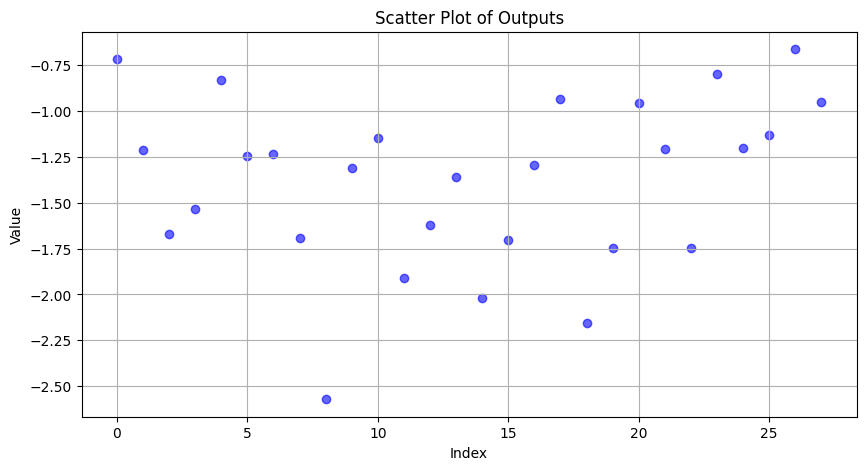

In [ ]:
#Visualise New Outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Example data (replace with your actual inputs and outputs)
N = 6  # Number of dimensions


# Standardize the initial training data to zero mean and unit variance
def standardize(X):
    mean = X.mean(0)
    std = X.std(0)
    return (X - mean) / std, mean, std

def unstandardize(X, mean, std):
    return X * std + mean

X_standardized, mean_X, std_X = standardize(inputs)


# Convert to torch tensors
train_X = torch.tensor(X_standardized, dtype=torch.double)
train_Y = torch.tensor(outputs, dtype=torch.double).unsqueeze(-1)


# Define the model
model = SingleTaskGP(train_X, train_Y)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)

# Define the acquisition function
acq_func = UpperConfidenceBound(model, beta=1.0)

# Define the objective for CMA-ES
def objective(x):
    x = torch.tensor(x, dtype=torch.double).unsqueeze(0)
    x_standardized = (x - mean_X) / std_X  # Standardize the input
    with torch.no_grad():
        acq_value = acq_func(x_standardized)
    return -acq_value.item()  # Negate because CMA-ES minimizes

# Initialize CMA-ES
es = cma.CMAEvolutionStrategy(train_X.mean(0).numpy(), 0.2, {'popsize': 20})

# Optimization loop
max_iter = 50  # Limit the number of iterations to avoid long runs
for _ in range(max_iter):
    solutions = es.ask()
    values = [objective(x) for x in solutions]
    es.tell(solutions, values)

# Best solution
best_solution = es.result.xbest
best_solution = torch.tensor(best_solution, dtype=torch.double).unsqueeze(0)
best_solution = unstandardize(best_solution, mean_X, std_X)

# Print best solution with 6 decimal places
best_solution_rounded = best_solution.numpy().round(6)

print(f"Best solution: {best_solution_rounded}")


/usr/local/lib/python3.10/dist-packages/botorch/models/utils/assorted.py:257: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(
/usr/local/lib/python3.10/dist-packages/botorch/models/utils/assorted.py:260: InputDataWarning: Data is not standardized (std = tensor([0.4621], dtype=torch.float64), mean = tensor([-1.3774], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  check_standardization(Y=train_Y, raise_on_fail=raise_on_fail)


(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 5 (seed=667953, Sun Jul 21 15:57:35 2024)
Best solution: [[0.729828 0.593948 0.553182 0.806502 0.47174 ]]


## Change Log
#### 16th May <br>
11/35 - using pseudo random distance generator
#### 19th May <br>
14/37 - using pseudo random distance generator
#### 9th June <br>
First switch to
Realise I have probably got the wrong settings at the outset and decide to get a bit more exploratory for a couple of weeks.  <br>
<ul>Position 23/40<br>
Change Beta from 0.1 to 1 <br>
Keep Pop Size 20 <br>
Set Sigma to 0.2 , from default of probably around 0.1</ul>

### 15th June START FROM HERE
Turns out what I was doing with TURBO was wrong.  I was failing to set the local area to be optimised or tracking state of the function.  Now trying again following the tutorial.
### Defines a data class to store the the state

In [ ]:
from dataclasses import dataclass
import numpy as np
import torch
import math
from botorch.generation import MaxPosteriorSampling
from torch.quasirandom import SobolEngine
import botorch
import gpytorch
import matplotlib.pyplot as plt


In [ ]:
# we define a dataclass for our state this is used to store the state of the area
@dataclass
class TurboState:
    dim: int # dimension of the problem, aka input dimension
    batch_size: int = 1 # we could do batch optimization, but the capstone only does one query at a time
    length: float = 0.4 # the length of the current trust region
    length_min: float = 0.25 ** 7 # minimum length for the trust region
    length_max: float = 0.2 # maximum length for the trust region
    failure_counter: int = 0 # initialize counter of the number of failures to improve on the best observation
    failure_tolerance: int = float("nan")  # Note: Post-initialized
    success_counter: int = 0 # initialize counter of the number of success to improve on the best observation
    success_tolerance: int = 3  # Note: The original paper uses 3, this is the number of successes in a row needed to expand the region
    best_value: float = -float("inf") # best value so far, initialized to be the infimum
    restart_triggered: bool = False

    # This method is automatically called after the dataclass is initialized. It sets the failure_tolerance attribute based on the dimension and batch size:
    def __post_init__(self):
        self.failure_tolerance = math.ceil(
            max([4.0 / self.batch_size, float(self.dim) / self.batch_size]) # number of failures needed in a row to shrink the trust region
        )

# this updates the state depending on Y_next
def update_state(state, Y_next):

    # count if a success, otherwise a failure
    if max(Y_next) > state.best_value + 1e-3 * math.fabs(state.best_value):
        state.success_counter += 1
        state.failure_counter = 0
    else:
        state.success_counter = 0
        state.failure_counter += 1
    # check if we need to expand or shrink the trust region
    if state.success_counter == state.success_tolerance:  # Expand trust region
        state.length = min(2.0 * state.length, state.length_max)
        state.success_counter = 0
    elif state.failure_counter == state.failure_tolerance:  # Shrink trust region
        state.length /= 2.0
        state.failure_counter = 0
    # set the best value if we got a new observation
    state.best_value = max(state.best_value, max(Y_next))
    if state.length < state.length_min:
        state.restart_triggered = True
    return state


In [ ]:
def generate_batch(
    state,
    model,  # GP model
    X,  # Evaluated points on the domain [0, 1]^d
    Y,  # Function values
    batch_size = 1, # fix batch size to 1
    n_candidates=None,  # Number of candidates for Thompson sampling
    num_restarts=10,
    raw_samples=512,
    acqf="ts",  # "ei" or "ts"
):
    assert acqf in ("ts")
    assert X.min() >= 0.0 and X.max() <= 1.0 and torch.all(torch.isfinite(Y))
    if n_candidates is None:
        n_candidates = min(5000, max(2000, 200 * X.shape[-1]))

    # Scale the trust region to be proportional to the lengthscales
    x_center = X[Y.argmax(), :].clone()
    weights = model.covar_module.base_kernel.lengthscale.squeeze().detach()
    weights = weights / weights.mean()
    weights = weights / torch.prod(weights.pow(1.0 / len(weights)))
    tr_lb = torch.clamp(x_center - weights * state.length / 2.0, 0.0, 1.0)
    tr_ub = torch.clamp(x_center + weights * state.length / 2.0, 0.0, 1.0)
    # we focus only on thompson sampling as an acquisition function
    if acqf == "ts":
        dim = X.shape[-1]
        sobol = SobolEngine(dim, scramble=True)
        pert = sobol.draw(n_candidates)
        pert = tr_lb + (tr_ub - tr_lb) * pert

        # Create a perturbation mask
        prob_perturb = min(20.0 / dim, 1.0)
        mask = (
            torch.rand(n_candidates, dim)
            <= prob_perturb
        )
        ind = torch.where(mask.sum(dim=1) == 0)[0]
        mask[ind, torch.randint(0, dim - 1, size=(len(ind),))] = 1

        # Create candidate points from the perturbations and the mask
        X_cand = x_center.expand(n_candidates, dim).clone()
        X_cand[mask] = pert[mask]

        # Sample on the candidate points
        # set model to evaluation mode
        model.eval()
        posterior_distribution = model(X_cand)
        with torch.no_grad():  # We don't need gradients when using TS
            posterior_sample = posterior_distribution.sample()
            X_next_idx = torch.argmax(posterior_sample)
            X_next = X_cand[X_next_idx]

    return X_next

In [ ]:
# we use the model given in the tutorial, we also add the hyper-parameter training as a method
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        # set a constant mean
        self.mean_module = gpytorch.means.ConstantMean()
        # use a simple RBF kernel with constant scaling
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=train_x.shape[1]))
        # set number of hyper-parameter training iterations
        self.training_iter = 200

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
#Step 1 Re-initialise the State
state = TurboState(
    dim=5,
    batch_size=1,
    length=0.3,
    length_max=0.5,
    success_counter = 0,
    failure_counter=3,
    best_value= -0.501737754668462
)

#Step 2 Update the State with the new function
y_next = [-0.951366249969857]
new_state = update_state(state, y_next)

print(state)
#Step 3 NOW append the new values!!!


TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=4, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.501737754668462, restart_triggered=False)


In [ ]:
# Mount Drive
# Get initial Values
inputs1 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_inputs.npy')
outputs1 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_outputs.npy')
inputs2 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_inputs2.npy')
outputs2 = np.load('/content/drive/My Drive/Imperial ML Course/Capstone Competition/function_6/initial_outputs2.npy')

# Concatenate inputs and outputs
inputs = np.concatenate((inputs1, inputs2), axis=0)
outputs = np.concatenate((outputs1, outputs2), axis=0)

#Import check
print(len(inputs1),len(inputs2),len(inputs))
print(len(outputs1),len(outputs2),len(outputs))



20 20 40
20 20 40


In [ ]:
#Add new Inputs and Outputs
new_inputs = np.array([[0.384406, 0.165901, 0.343644, 0.878119, 0.414417],[0.64144,  0.768168, 0.296642, 0.67985,  0.005163],[0.768398, 0.20439,  0.45594,  0.444113,0.761264],[0.072555 ,0.698342, 0.698161, 0.863136 ,0.118136],[0.717999, 0.639943, 0.519482 ,0.772148 ,0.505876],[0.719796, 0.639673, 0.519655, 0.774452, 0.505773],[0.567095, 0.047709, 0.626556, 0.884659, 0.027518],[0.56812,  0.10389,  0.856833, 0.890358, 0.002649],[0.667431, 0.00746,  0.596242, 0.560694, 0.016542],[0.615272, 0.028036, 0.669298, 0.838814, 0.01508 ],[0.477788, 0.110788, 0.522569, 0.975533, 0.005616],[0.485859, 0.17601,  0.766418, 0.965114, 0.140616]])
new_outputs = np.array([-0.95813506330093,-1.20790243875159,-1.74412417525756,-0.800128372422867,-1.20153120166717, -1.13274833342684,-0.74302164555618, -0.895695186,-0.938212055378909,-0.501737754668462,-0.822223726337242,-0.569402212276701])


In [ ]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(outputs)
print(np.max(outputs))

[-0.71426495 -1.20995524 -1.67219994 -1.53605771 -0.82923655 -1.24704893
 -1.23378638 -1.69434344 -2.57116963 -1.30911635 -1.14478485 -1.91267714
 -1.62283895 -1.35668211 -2.0184254  -1.70255784 -1.29424696 -0.93575656
 -2.15576776 -1.74688209 -1.51269542 -1.34959856 -1.82739562 -1.71602331
 -0.97248425 -1.20521138 -1.10099104 -1.91309535 -1.05157417 -1.19458833
 -2.06906505 -1.48937327 -1.82528398 -1.7476171  -1.35823203 -1.44913772
 -1.81134837 -2.00771782 -0.99967761 -1.67533648 -0.95813506 -1.20790244
 -1.74412418 -0.80012837 -1.2015312  -1.13274833 -0.74302165 -0.89569519
 -0.93821206 -0.50173775 -0.82222373 -0.56940221]
-0.501737754668462


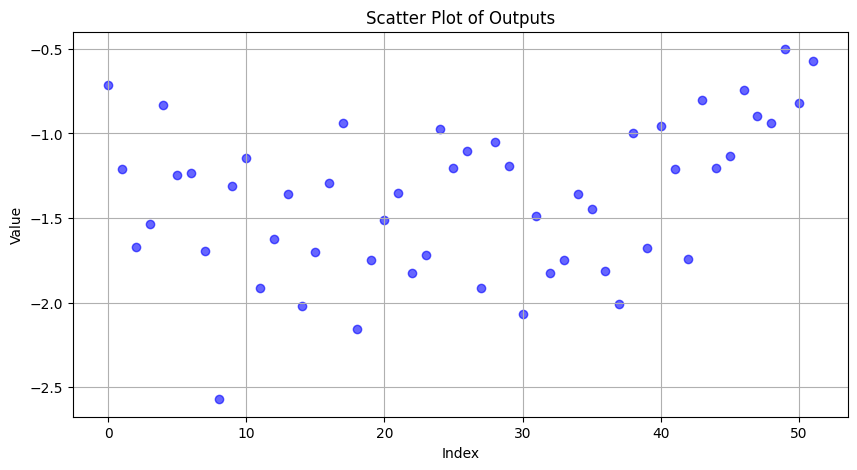

In [ ]:
#Visualise New Outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(10, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [ ]:
# Convert to torch tensors
train_X = torch.from_numpy(inputs).to(torch.float32)
train_Y = torch.from_numpy(outputs).to(torch.float32)


In [ ]:
def next_query_via_TurBO(train_x, train_y, turbo_state, verbose = False):
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)


    for i in range(model.training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_X)
        # Calc loss and backprop gradients
        print(output)
        print(train_Y.dtype)
        break
        loss = -mll(output, train_Y)
        loss.backward()
        if i % 10 == 9:
            print(f'Iter %d/%d - Loss: %.6f   lengthscale: {model.covar_module.base_kernel.lengthscale.detach()}   noise: %.6f' % (
                i + 1, model.training_iter, loss.item(),
                model.likelihood.noise.item()
            ))
        optimizer.step()

    return generate_batch(turbo_state, model = model, X = train_x, Y = train_y)

In [ ]:
print(np.max(outputs))

-0.501737754668462


In [ ]:
next_query = next_query_via_TurBO(train_x=train_X, train_y=train_Y, turbo_state=state)
formatted_query = [f'{item:.6f}' for item in next_query]
formatted_output = f'{formatted_query[0]}-{formatted_query[1]}-{formatted_query[2]}-{formatted_query[3]}-{formatted_query[4]}'
print(f'Next chosen query: {formatted_output}')
print(state)

MultivariateNormal(loc: torch.Size([52]))
torch.float32
Next chosen query: 0.490308-0.163106-0.595141-0.904191-0.009533
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=4, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.501737754668462, restart_triggered=False)


Entry 15th June: <br>MultivariateNormal(loc: torch.Size([26]))
torch.float32
Next chosen query: 0.567095-0.047709-0.626556-0.884659-0.027518
TurboState(dim=5, batch_size=1, length=0.4, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=5, success_counter=0, success_tolerance=10, best_value=-inf, restart_triggered=False)


Entry 20th June: Restart as did not put in best value<br>
Next chosen query: 0.568120-0.103890-0.856833-0.890358-0.002649
TurboState(dim=5, batch_size=1, length=0.4, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=5, success_counter=0, success_tolerance=10, best_value=-inf, restart_triggered=False)

Entry 23rd June - Reduced Success exopansion to 3. <br>
Next chosen query: 0.667431-0.007460-0.596242-0.560694-0.016542
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=1, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.7142649478202404, restart_triggered=False)


Entry 7th July<br>
Next chosen query: 0.615272-0.028036-0.669298-0.838814-0.015080
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=2, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.7142649478202404, restart_triggered=False)


Entry 11th July<br>
Next chosen query: 0.477788-0.110788-0.522569-0.975533-0.005616
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=0, failure_tolerance=5, success_counter=1, success_tolerance=3, best_value=-0.662340786722959, restart_triggered=False)

Entry 13th July<br>
Next chosen query: 0.485859-0.176010-0.766418-0.965114-0.140616
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=2, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.501737754668462, restart_triggered=False)


Entry 17th July<br>
Next chosen query: 0.618083-0.038536-0.810867-0.980269-0.014503
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=3, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.501737754668462, restart_triggered=False)

Entry 21st July<br>
Next chosen query: 0.490308-0.163106-0.595141-0.904191-0.009533
TurboState(dim=5, batch_size=1, length=0.3, length_min=6.103515625e-05, length_max=0.5, failure_counter=4, failure_tolerance=5, success_counter=0, success_tolerance=3, best_value=-0.501737754668462, restart_triggered=False)
